a) Mean Age:54.26
b) Heart Disease Counts:
HeartDisease
0    110
1     90
Name: count, dtype: int64
c) Max Cholesterol:299, Min Cholesterol:150
d) Individuals with BMI > 30: 44
e) High BP & Heart Disease: 39


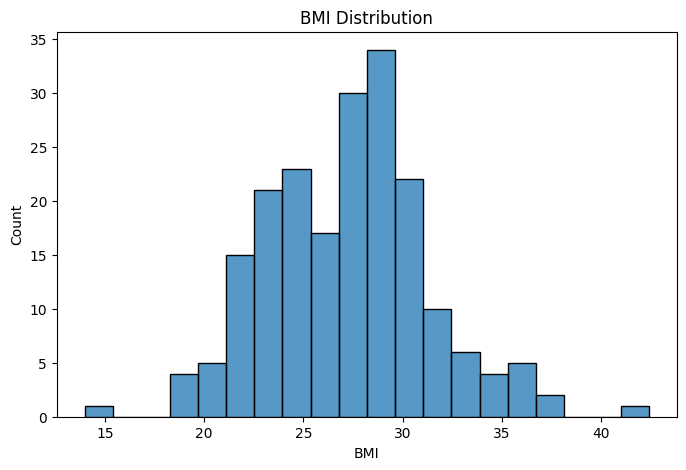

f) Most common BMI range:(np.float64(28.2), np.float64(29.619999999999997))


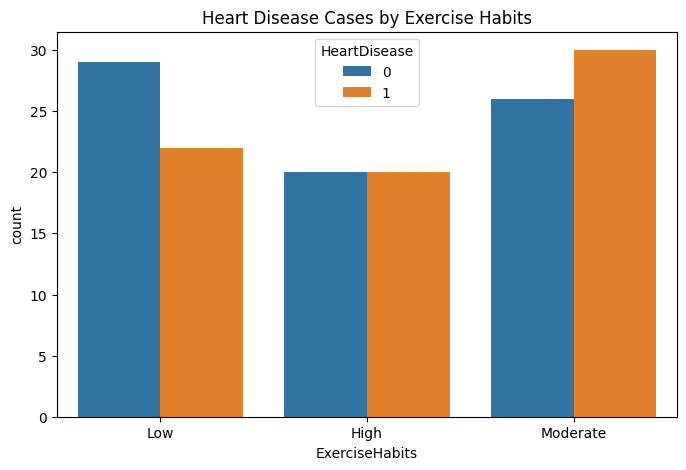

h) Lowest risk group:Low


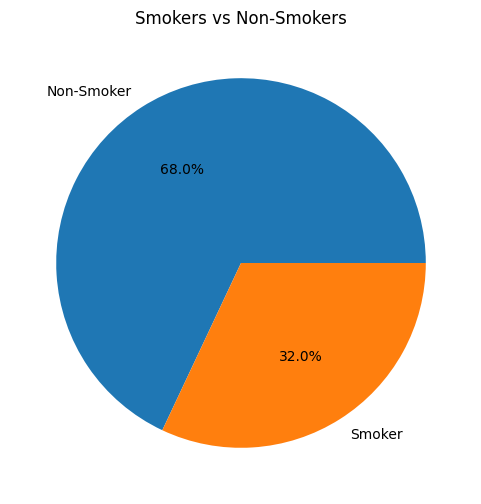

j) Percentage of smokers:32.00%


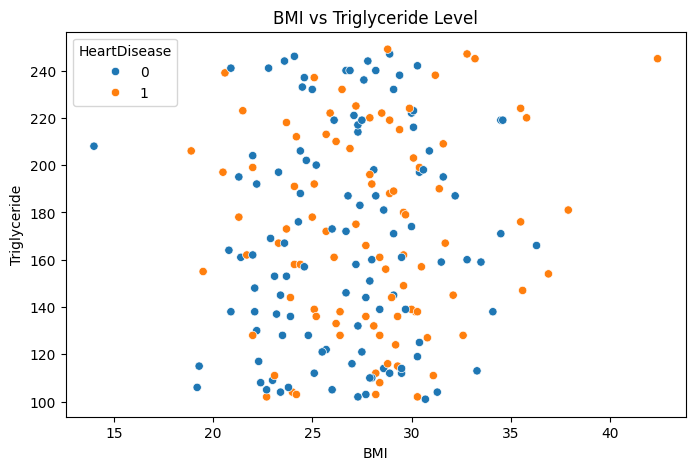

l) Check scatter plot visually for clustering or trend (e.g., higher BMI linked to higher triglycerides).


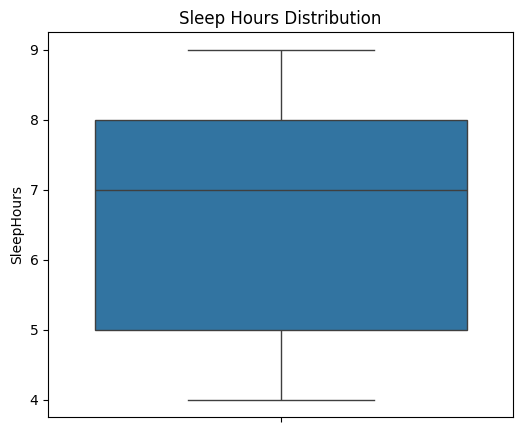

n) Median Sleep Hours:7.0


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
df=pd.read_csv("heart_data.csv")
mean_age=df['Age'].mean()
print(f"a) Mean Age:{mean_age:.2f}")
heart_counts=df['HeartDisease'].value_counts()
print("b) Heart Disease Counts:")
print(heart_counts)
max_chol=df['Cholesterol'].max()
min_chol=df['Cholesterol'].min()
print(f"c) Max Cholesterol:{max_chol}, Min Cholesterol:{min_chol}")
bmi_over_30=(df['BMI']>30).sum()
print(f"d) Individuals with BMI > 30: {bmi_over_30}")
highbp_hd=df[(df['HighBP']==1)&(df['HeartDisease']==1)].shape[0]
print(f"e) High BP & Heart Disease: {highbp_hd}")
plt.figure(figsize=(8,5))
sns.histplot(df['BMI'],bins=20,kde=False)
plt.title("BMI Distribution")
plt.xlabel("BMI")
plt.ylabel("Count")
plt.show()
bmi_counts,bins=np.histogram(df['BMI'],bins=20)
most_common_bin=bins[bmi_counts.argmax()],bins[bmi_counts.argmax()+1]
print(f"f) Most common BMI range:{most_common_bin}")
plt.figure(figsize=(8,5))
sns.countplot(x='ExerciseHabits',hue='HeartDisease',data=df)
plt.title("Heart Disease Cases by Exercise Habits")
plt.show()
risk_by_exercise=df.groupby('ExerciseHabits')['HeartDisease'].mean()
lowest_risk_group=risk_by_exercise.idxmin()
print(f"h) Lowest risk group:{lowest_risk_group}")
smoker_counts=df['Smoker'].value_counts()
plt.figure(figsize=(6,6))
plt.pie(smoker_counts, labels=['Non-Smoker','Smoker'],autopct='%1.1f%%')
plt.title("Smokers vs Non-Smokers")
plt.show()
smoker_percentage=(df['Smoker'].sum()/len(df))*100
print(f"j) Percentage of smokers:{smoker_percentage:.2f}%")
plt.figure(figsize=(8,5))
sns.scatterplot(x='BMI',y='Triglyceride',hue='HeartDisease',data=df)
plt.title("BMI vs Triglyceride Level")
plt.show()
print("l) Check scatter plot visually for clustering or trend (e.g., higher BMI linked to higher triglycerides).")
plt.figure(figsize=(6,5))
sns.boxplot(y='SleepHours',data=df)
plt.title("Sleep Hours Distribution")
plt.show()
median_sleep=df['SleepHours'].median()
print(f"n) Median Sleep Hours:{median_sleep}")
q1=df['SleepHours'].quantile(0.25)
q3=df['SleepHours'].quantile(0.75)
iqr=q3-q1
